In [1]:
print("Bank Note Authentication")

Bank Note Authentication


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,Input,MaxPooling2D


Loading the Dataset

In [3]:
base_dir=r"D:\pds_project\UTKFace"
image_path=[]
age_label=[]
gender_label=[]

for filename in os.listdir(base_dir):
    #print(filename)---100_0_0_20170112213500903.jpg.chip.jpg
    img_path=os.path.join(base_dir,filename)
    temp=filename.split("_")
    age=int(temp[0])
    gender=int(temp[1])
    image_path.append(img_path)
    age_label.append(age)
    gender_label.append(gender)



In [4]:
df=pd.DataFrame()
df['image'],df['age'],df['gender']=image_path,age_label,gender_label
df.head()

,image,age,gender
0,D:\pds_project\UTKFace\100_0_0_201701122135009...,100,0
1,D:\pds_project\UTKFace\100_0_0_201701122152403...,100,0
2,D:\pds_project\UTKFace\100_1_0_201701101837263...,100,1
3,D:\pds_project\UTKFace\100_1_0_201701122130019...,100,1
4,D:\pds_project\UTKFace\100_1_0_201701122133036...,100,1


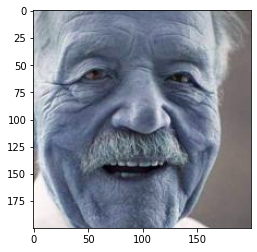

In [5]:
gender_dict={0:'Male',1:'Female'}
import cv2
img=cv2.imread(df['image'][0],1)
#img=cv2.resize(img,(128,128))
plt.imshow(img)
plt.show()


<Figure size 864x432 with 0 Axes>

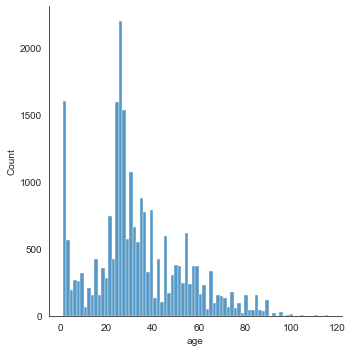

In [6]:

sns.set_style('white')
plt.figure(figsize =(12, 6))
sns.set_context( font_scale = 2)
sns.displot(df['age'])


<AxesSubplot:xlabel='gender', ylabel='count'>

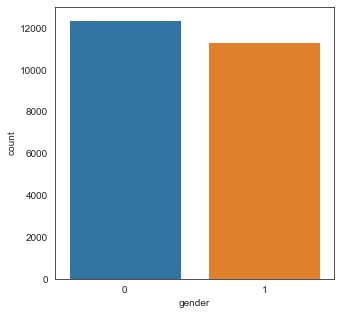

In [7]:

sns.set_style('white')
plt.figure(figsize =(5,5))
sns.set_context( font_scale = 1)
sns.countplot(x=df['gender'])

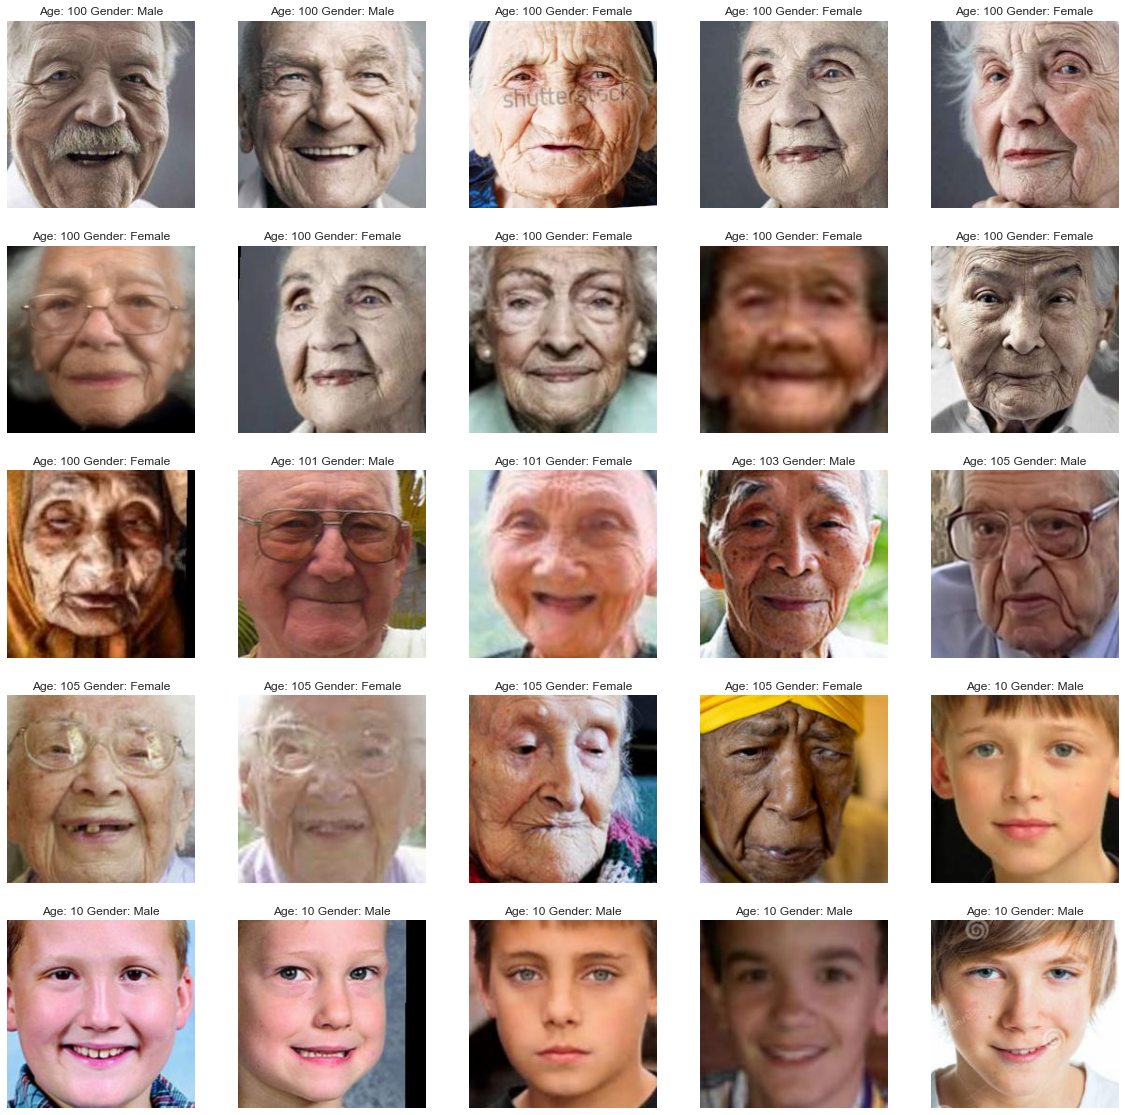

In [8]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

Features Extraction

In [9]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode = "grayscale")
        img = img.resize((128, 128))
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

x = extract_features(df['image'])
print(x.shape)

(23708, 128, 128, 1)


In [10]:
x=x/225.0
y_gender=np.array(df['gender'])
y_age=np.array(df['age'])

In [11]:
input_shape = (128, 128, 1)

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

model.summary()

'''# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)'''

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

'# plot the model\nfrom tensorflow.keras.utils import plot_model\nplot_model(model)'

In [12]:
history = model.fit(x=x, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
593/593 [==============================] - 52s 65ms/step - loss: 10.7411 - gender_out_loss: 0.6766 - age_out_loss: 10.0645 - gender_out_accuracy: 0.5536 - age_out_accuracy: 0.0578 - val_loss: 28.9816 - val_gender_out_loss: 0.5773 - val_age_out_loss: 28.4043 - val_gender_out_accuracy: 0.7016 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 29s 49ms/step - loss: 7.9260 - gender_out_loss: 0.4560 - age_out_loss: 7.4701 - gender_out_accuracy: 0.7836 - age_out_accuracy: 0.0285 - val_loss: 28.5845 - val_gender_out_loss: 0.4927 - val_age_out_loss: 28.0918 - val_gender_out_accuracy: 0.7604 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 29s 49ms/step - loss: 7.1580 - gender_out_loss: 0.3737 - age_out_loss: 6.7843 - gender_out_accuracy: 0.8295 - age_out_accuracy: 0.0133 - val_loss: 24.0423 - val_gender_out_loss: 0.4724 - val_age_out_loss: 23.5699 - val_gender_out_accuracy: 0.7777 - val_age_out_accuracy: 0

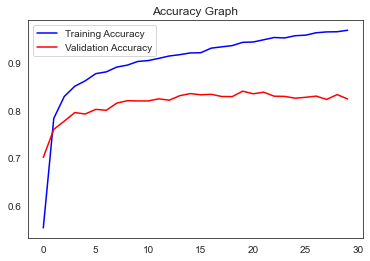

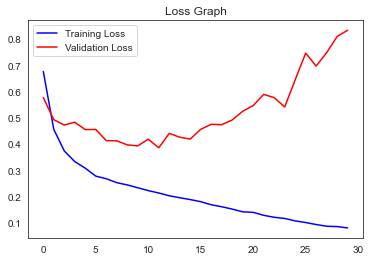

In [15]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

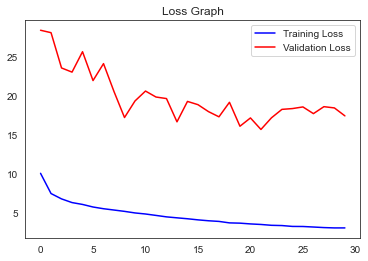

In [16]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


In [17]:
model.save("Age_Gender_Classsification.h5")

Original Gender: Male Original Age: 10
Predicted Gender: Male Predicted Age: 12


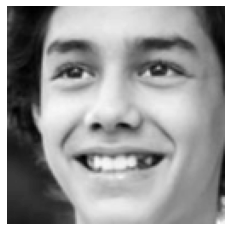

In [19]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(x[image_index].reshape(128, 128), cmap='gray')

Original Gender: Male Original Age: 21
Predicted Gender: Male Predicted Age: 25


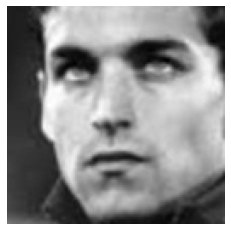

In [20]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(x[image_index].reshape(128, 128), cmap='gray')

Original Gender: Female Original Age: 29
Predicted Gender: Female Predicted Age: 29


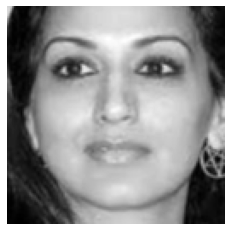

In [21]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(x[image_index].reshape(128, 128), cmap='gray')